In [3]:
import pandas as pd 
import os
import csv

In [4]:
train_dir = 'train'
test_dir = 'test'

train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

print("Train:", train_files)
print("Test:", test_files)

Train: ['enojado', 'serio', 'triste']
Test: ['enojado', 'serio', 'triste']


In [5]:
train_dir = 'train'
test_dir = 'test'

train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

print("Train:", train_files)
print("Test:", test_files)

categories = {}
for category in train_files:
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):  
        categories[category] = [
            os.path.join(category_path, file).replace("\\", "/")  
            for file in os.listdir(category_path)
            if os.path.isfile(os.path.join(category_path, file))
        ]

for category, files in categories.items():
    print(f"{category}: {files}")

Train: ['enojado', 'serio', 'triste']
Test: ['enojado', 'serio', 'triste']
enojado: ['train/enojado/gau_11.png', 'train/enojado/gau_15.png', 'train/enojado/gau_4.png', 'train/enojado/mov_7.png', 'train/enojado/n_1.jpg', 'train/enojado/n_11.jpg', 'train/enojado/n_12.jpg', 'train/enojado/n_15.jpg', 'train/enojado/n_4.jpg', 'train/enojado/n_7.jpg', 'train/enojado/rot_1.png', 'train/enojado/rot_11.png', 'train/enojado/rot_12.png', 'train/enojado/rot_7.png']
serio: ['train/serio/gau_19.png', 'train/serio/gau_5.png', 'train/serio/gau_8.png', 'train/serio/mov_10.png', 'train/serio/n_10.jpg', 'train/serio/n_14.jpg', 'train/serio/n_16.jpg', 'train/serio/n_19.jpg', 'train/serio/n_2.jpg', 'train/serio/n_5.jpg', 'train/serio/n_8.jpg', 'train/serio/rot_14.png', 'train/serio/rot_16.png', 'train/serio/rot_2.png']
triste: ['train/triste/gau_13.png', 'train/triste/gau_18.png', 'train/triste/mov_6.png', 'train/triste/mov_9.png', 'train/triste/n_13.jpg', 'train/triste/n_17.jpg', 'train/triste/n_18.jpg', 

In [6]:
label_map = {label: idx for idx, label in enumerate(categories.keys())}
print("Label map:", label_map)

Label map: {'enojado': 0, 'serio': 1, 'triste': 2}


In [7]:
csv_path = 'train_labels.csv'

with open(csv_path, mode='w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['filepath', 'label'])  

    for label, files in categories.items():
        label_idx = label_map[label]
        for filepath in files:
            writer.writerow([filepath, label_idx])

print(f"CSV guardado en {csv_path}")

CSV guardado en train_labels.csv


In [8]:
csv_path = 'test_labels.csv'

with open(csv_path, mode='w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['filepath', 'label'])

    for label, files in categories.items():
        label_idx = label_map[label]
        for filepath in files:
            writer.writerow([filepath, label_idx])

print(f"CSV guardado en {csv_path}")

CSV guardado en test_labels.csv


In [12]:
len("train_labels.csv")

16

In [9]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label = int(self.data.iloc[idx, 1])
        image = read_image(img_path).float() / 255.0

        if image.shape[0] == 1:
            image = image.repeat(3, 1, 1)
        elif image.shape[0] == 4: 
            image = image[:3, :, :]

        if self.transform:
            image = self.transform(image)

        return image, label


In [10]:
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((512, 512)),  
   # RandomCrop, ToTensor, Normalize, etc.
])

train_dataset = CustomImageDataset('train_labels.csv', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

images, labels = next(iter(train_loader))
print(images.shape, labels)


torch.Size([32, 3, 512, 512]) tensor([2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 1, 0, 0, 1,
        0, 0, 2, 2, 0, 1, 1, 2])


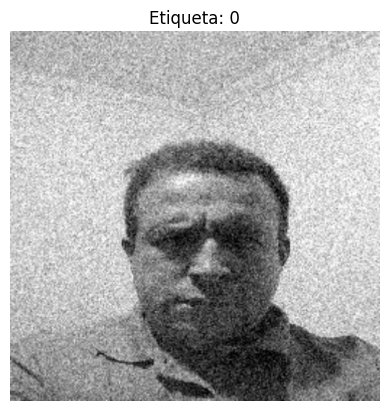

In [11]:
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

image, label = train_dataset[0]  

plt.imshow(to_pil_image(image))  
plt.title(f"Etiqueta: {label}")
plt.axis('off')
plt.show()